In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
add= pd.read_csv('advertising.csv')

In [36]:
add.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [37]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [38]:
add.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [39]:
add.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


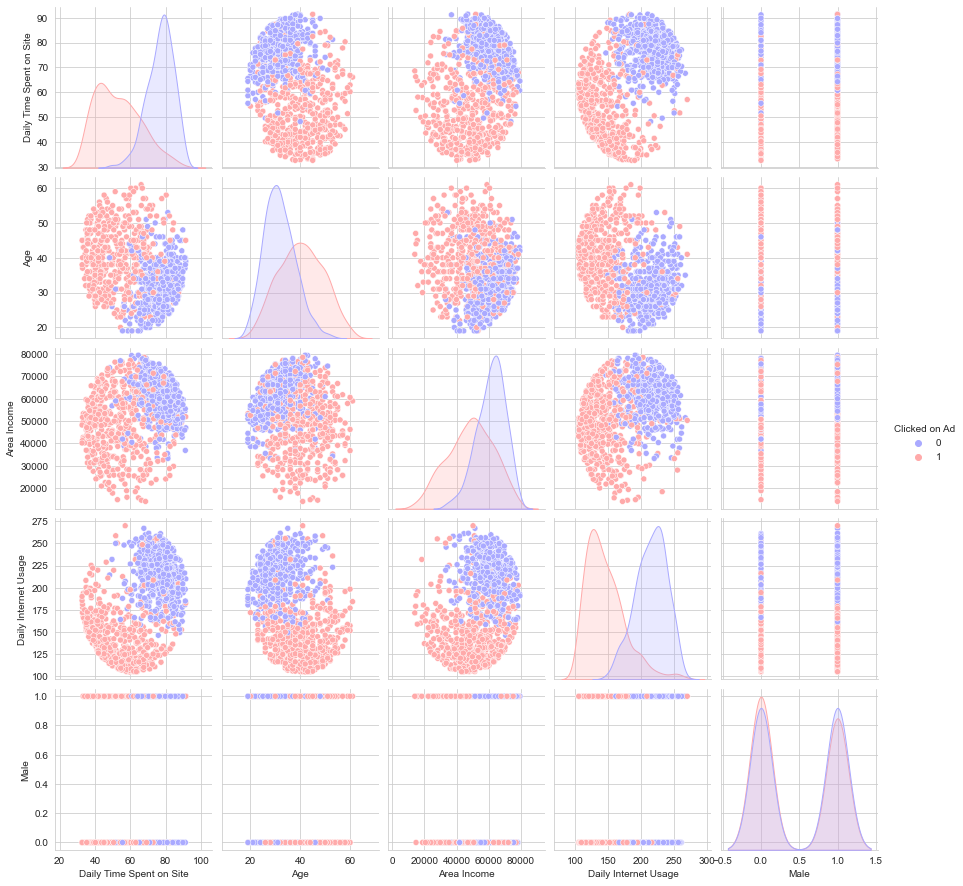

In [40]:
sns.pairplot(add,hue='Clicked on Ad',palette='bwr');

Text(0.5, 0, 'Age')

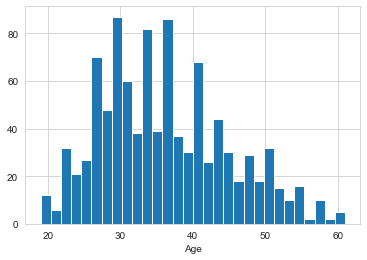

In [41]:
sns.set_style('whitegrid')
add['Age'].hist(bins=30)
plt.xlabel('Age')

In [43]:
# create bins
bins=np.arange(10,70,10)

# assign bins to data

add['bin'] =pd.cut(add['Age'],bins)
add.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,bin
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,"(30, 40]"
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,"(30, 40]"
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,"(20, 30]"
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,"(20, 30]"
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,"(30, 40]"


<AxesSubplot:xlabel='bin', ylabel='Area Income'>

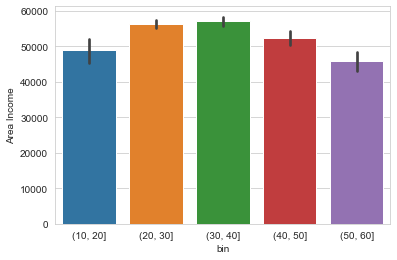

In [44]:
sns.barplot(x='bin',y='Area Income',data=add)

# create a plot of daily time spent vs age


<AxesSubplot:xlabel='bin', ylabel='Daily Time Spent on Site'>

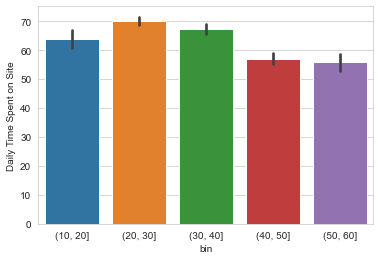

In [47]:

sns.barplot(data=add,x='bin',y='Daily Time Spent on Site')

## create a plot of daily time spend on site vs daily internet usage

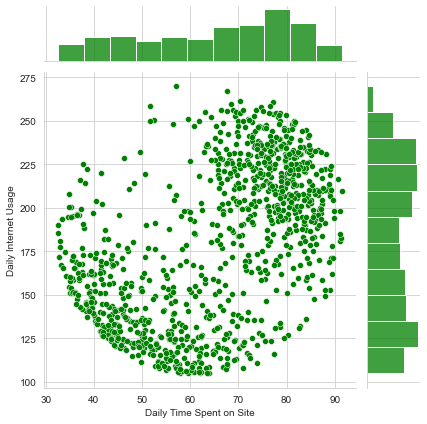

In [101]:
sns.jointplot(data=add,x='Daily Time Spent on Site',y='Daily Internet Usage',color='green')

In [102]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [121]:
X= add[['Daily Time Spent on Site','Age',"Area Income"]]

In [122]:
Y=add['Clicked on Ad']

In [123]:
model=LogisticRegression()
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,random_state=104, test_size=0.3, shuffle=True)

In [124]:
model.fit(X_train,Y_train)

LogisticRegression()

In [125]:
predictions=model.predict(X_train)


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
print(confusion_matrix(Y_train,predictions))

[[323  21]
 [ 35 321]]


In [130]:
tn,fp,fn,tp=confusion_matrix(Y_train,predictions).ravel()
tn,fp,fn,tp

(323, 21, 35, 321)